## Visualizing and cleaning

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from functions_EDA_2 import categorical_distribution, boxplot_with_outliers, boxplots

I am going to visualize data, check for outliers and clean data.

In [3]:
df_survey_2016 = pd.read_excel("./data/df_survey_2016_clean.xlsx")
df_survey_2016

,HHIDPN,HHID,age_2016,gender_2016,life_satisfaction_2016,high_blood_pressure_2016,diabetes_2016,cancer_2016,lung_disease_2016,heart_condition_2016,stroke_2016,psych_problems_2016,dementia_2016,cholesterol_2016,weight_2016
0,10001010,10001,76,Male,VERY SATISFIED,NO,NO,NO,NO,NO,NO,NO,NO,YES,140.0
1,10003030,10003,60,Female,VERY SATISFIED,YES,NO,NO,NO,NO,NO,YES,NO,NO,190.0
2,10004040,10004,70,Female,COMPLETELY SATISFIED,NO,NO,NO,NO,NO,NO,NO,NO,NO,150.0
3,10013040,10013,68,Female,SOMEWHAT SATISFIED,NO,NO,NO,NO,NO,NO,NO,NO,YES,131.0
4,10038010,10038,79,Male,VERY SATISFIED,YES,NO,NO,NO,YES,NO,NO,NO,NO,160.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20907,923525010,923525,59,Female,VERY SATISFIED,YES,NO,NO,NO,NO,YES,NO,NO,YES,148.0
20908,923525020,923525,61,Male,VERY SATISFIED,NO,NO,NO,NO,NO,NO,NO,NO,NO,155.0
20909,952836010,952836,56,Female,VERY SATISFIED,NO,YES,NO,NO,NO,NO,NO,NO,YES,151.0
20910,958361010,958361,51,Male,SOMEWHAT SATISFIED,NO,NO,NO,NO,YES,NO,NO,NO,NO,180.0


In [5]:
df_survey_2016.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20912 entries, 0 to 20911
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   HHIDPN                    20912 non-null  int64  
 1   HHID                      20912 non-null  int64  
 2   age_2016                  20912 non-null  int64  
 3   gender_2016               20912 non-null  object 
 4   life_satisfaction_2016    19971 non-null  object 
 5   high_blood_pressure_2016  20912 non-null  object 
 6   diabetes_2016             20911 non-null  object 
 7   cancer_2016               20911 non-null  object 
 8   lung_disease_2016         20911 non-null  object 
 9   heart_condition_2016      20911 non-null  object 
 10  stroke_2016               20911 non-null  object 
 11  psych_problems_2016       20911 non-null  object 
 12  dementia_2016             20601 non-null  object 
 13  cholesterol_2016          20911 non-null  object 
 14  weight

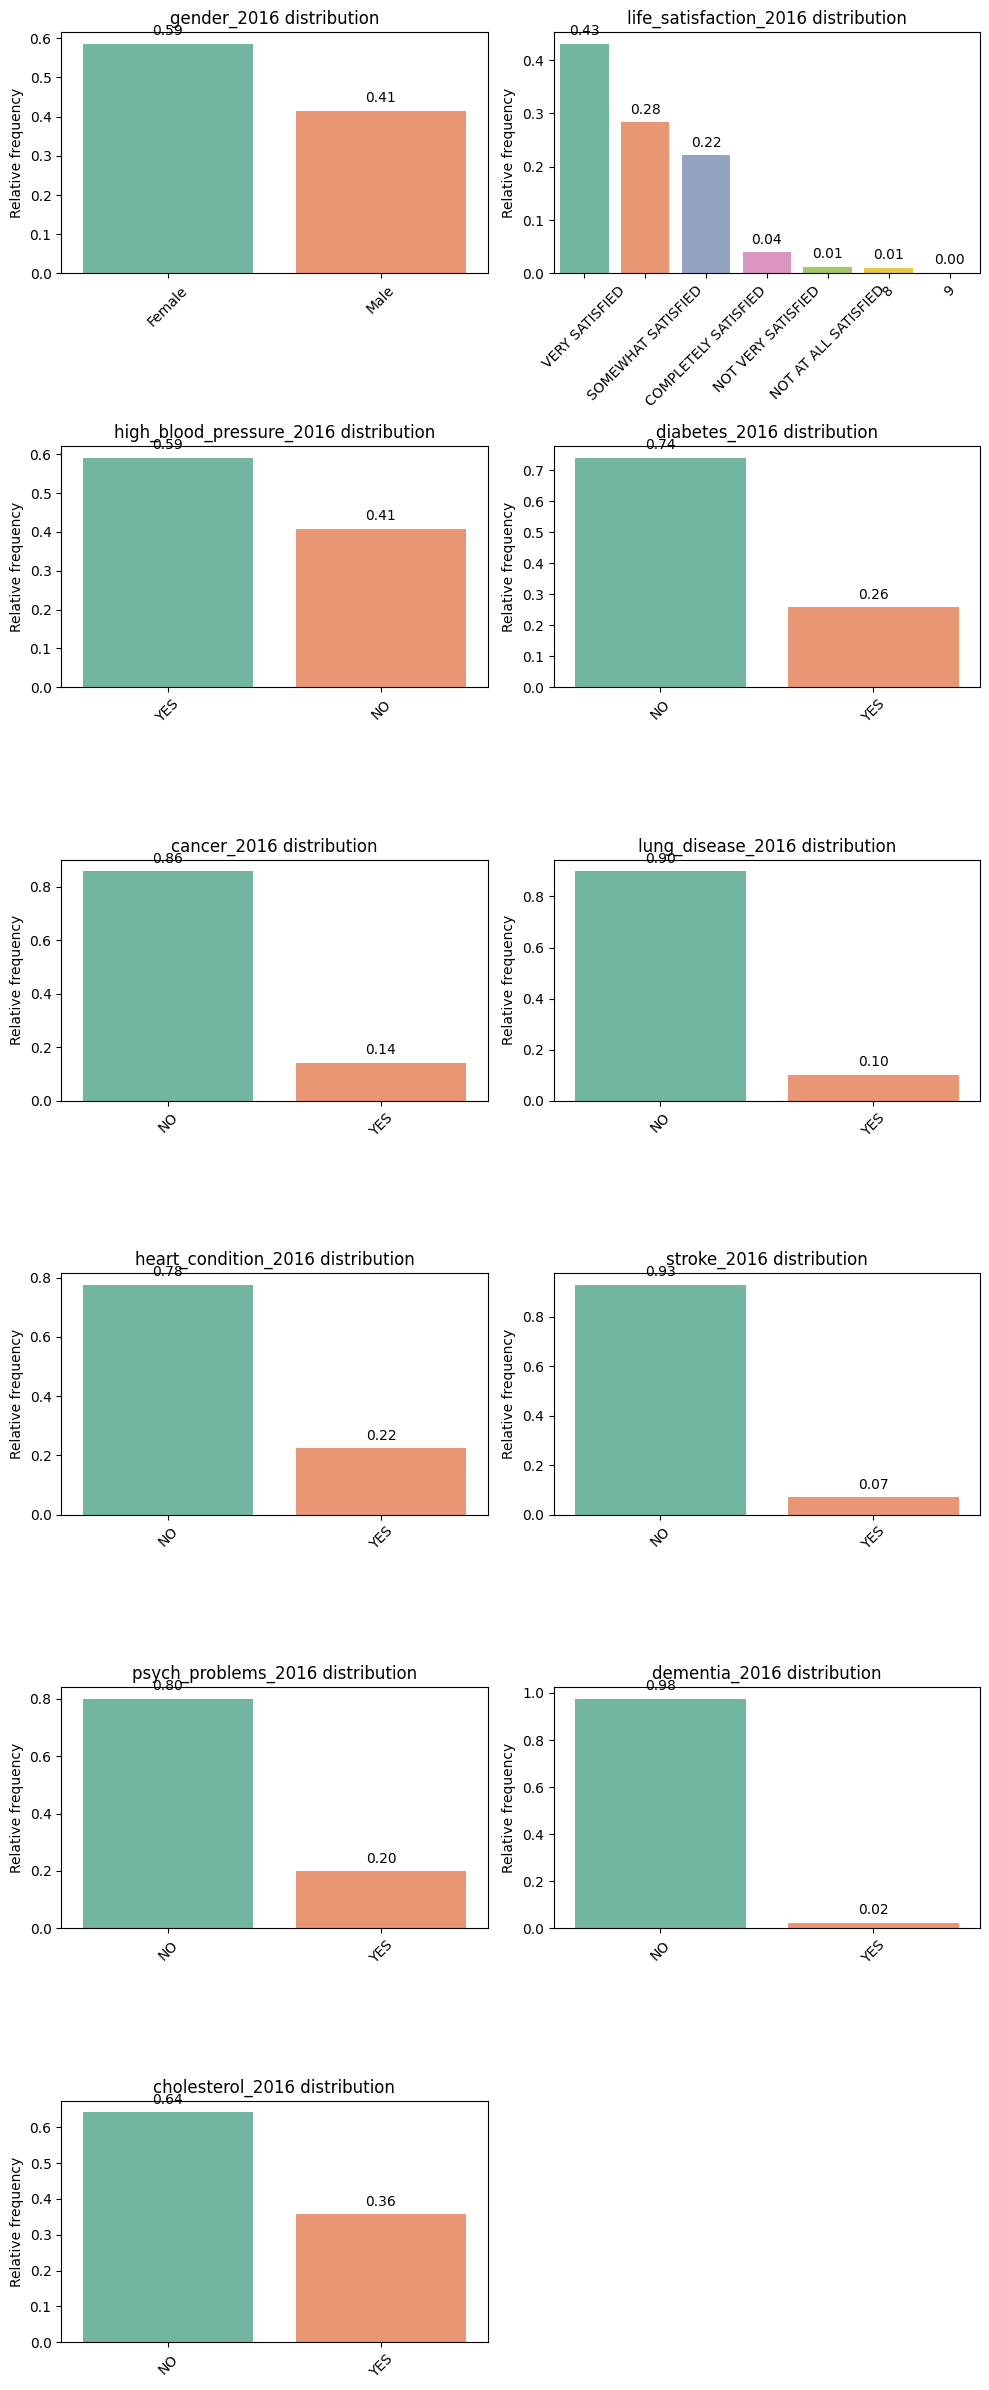

In [6]:
categorical_distribution(df_survey_2016, ["gender_2016","life_satisfaction_2016", "high_blood_pressure_2016","diabetes_2016","cancer_2016","lung_disease_2016", 
                                                "heart_condition_2016", "stroke_2016", "psych_problems_2016", "dementia_2016", "cholesterol_2016"], relative = True, values= True)

2 things to note:

- Life satisfaction has 8 and 9 -> check meaning and clean accordingly.
- hihg lood, pressure, diabetes, heart condition and cholesterol can be interesting for differences.

In [166]:
#8 means NOT VERY SATISFIED and 9 means NOT AT ALL SATISFIED SO I CLEAN.

satisfaction_mapping = {
    1: "COMPLETELY SATISFIED",
    2: "VERY SATISFIED",
    3: "SOMEWHAT SATISFIED",
    4: "NOT VERY SATISFIED",
    5: "NOT AT ALL SATISFIED",
    8: "NOT VERY SATISFIED",
    9: "NOT AT ALL SATISFIED"
}
df_survey_2016["life_satisfaction_2016"] = df_survey_2016["life_satisfaction_2016"].replace(satisfaction_mapping)



In [167]:
df_survey_2016.life_satisfaction_2016.value_counts()

life_satisfaction_2016
VERY SATISFIED          8595
SOMEWHAT SATISFIED      5666
COMPLETELY SATISFIED    4431
NOT VERY SATISFIED      1005
NOT AT ALL SATISFIED     274
Name: count, dtype: int64

Now I'm going to check the numerical data (age and weight):

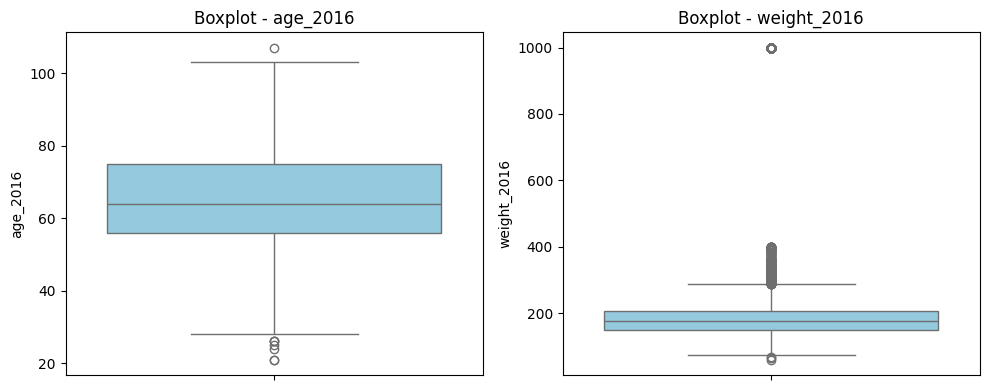

In [7]:
boxplot_with_outliers(df_survey_2016, columns=["age_2016", "weight_2016"])

In [170]:
df_survey_2016.age_2016.value_counts()

age_2016
57     833
55     809
56     807
54     776
53     766
      ... 
21       2
30       2
107      1
24       1
25       1
Name: count, Length: 81, dtype: int64

In [171]:
df_survey_2016.weight_2016.max()

999.0

In [172]:
max_weight = df_survey_2016['weight_2016'].idxmax()

row_max_weight = df_survey_2016.loc[max_weight]

print(row_max_weight)

HHIDPN                            11179010
HHID                                 11179
age_2016                                79
gender_2016                         Female
life_satisfaction_2016      VERY SATISFIED
high_blood_pressure_2016               YES
diabetes_2016                           NO
cancer_2016                             NO
lung_disease_2016                       NO
heart_condition_2016                    NO
stroke_2016                             NO
psych_problems_2016                     NO
dementia_2016                           NO
cholesterol_2016                       YES
weight_2016                          999.0
Name: 73, dtype: object


This person can be an outlier, I am not going to delete him but to take note (this weight is super high but not impossible).

In [173]:
output_file = "./data/df_survey_2016_clean2.xlsx"
df_survey_2016.to_excel(output_file, index=False)

Now I do the same with survey_2018 and survey_2020:

In [9]:
df_survey_2018 = pd.read_excel("./data/df_survey_2018_clean.xlsx")
df_survey_2018

,HHIDPN,HHID,age_2018,gender_2018,life_satisfaction_2018,high_blood_pressure_2018,diabetes_2018,cancer_2018,lung_disease_2018,heart_condition_2018,stroke_2018,psych_problems_2018,dementia_2018,cholesterol_2018,weight_2018
0,10003030,10003,62,Female,SOMEWHAT SATISFIED,YES,NO,NO,NO,NO,NO,YES,NO,YES,200.0
1,10004040,10004,72,Female,COMPLETELY SATISFIED,YES,NO,NO,NO,NO,NO,NO,NO,NO,160.0
2,10013040,10013,70,Female,VERY SATISFIED,NO,NO,NO,NO,NO,NO,NO,NO,YES,140.0
3,10038010,10038,81,Male,VERY SATISFIED,YES,NO,NO,NO,YES,NO,NO,NO,NO,155.0
4,10038040,10038,75,Female,VERY SATISFIED,NO,NO,NO,NO,NO,NO,NO,NO,NO,138.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17141,923498010,923498,62,Female,VERY SATISFIED,NO,NO,NO,NO,NO,NO,NO,NO,NO,196.0
17142,923525010,923525,61,Female,VERY SATISFIED,YES,NO,NO,NO,NO,YES,NO,NO,YES,145.0
17143,923525020,923525,63,Male,COMPLETELY SATISFIED,NO,NO,NO,NO,NO,NO,NO,NO,NO,160.0
17144,952836010,952836,58,Female,VERY SATISFIED,NO,YES,NO,NO,NO,NO,NO,NO,YES,148.0


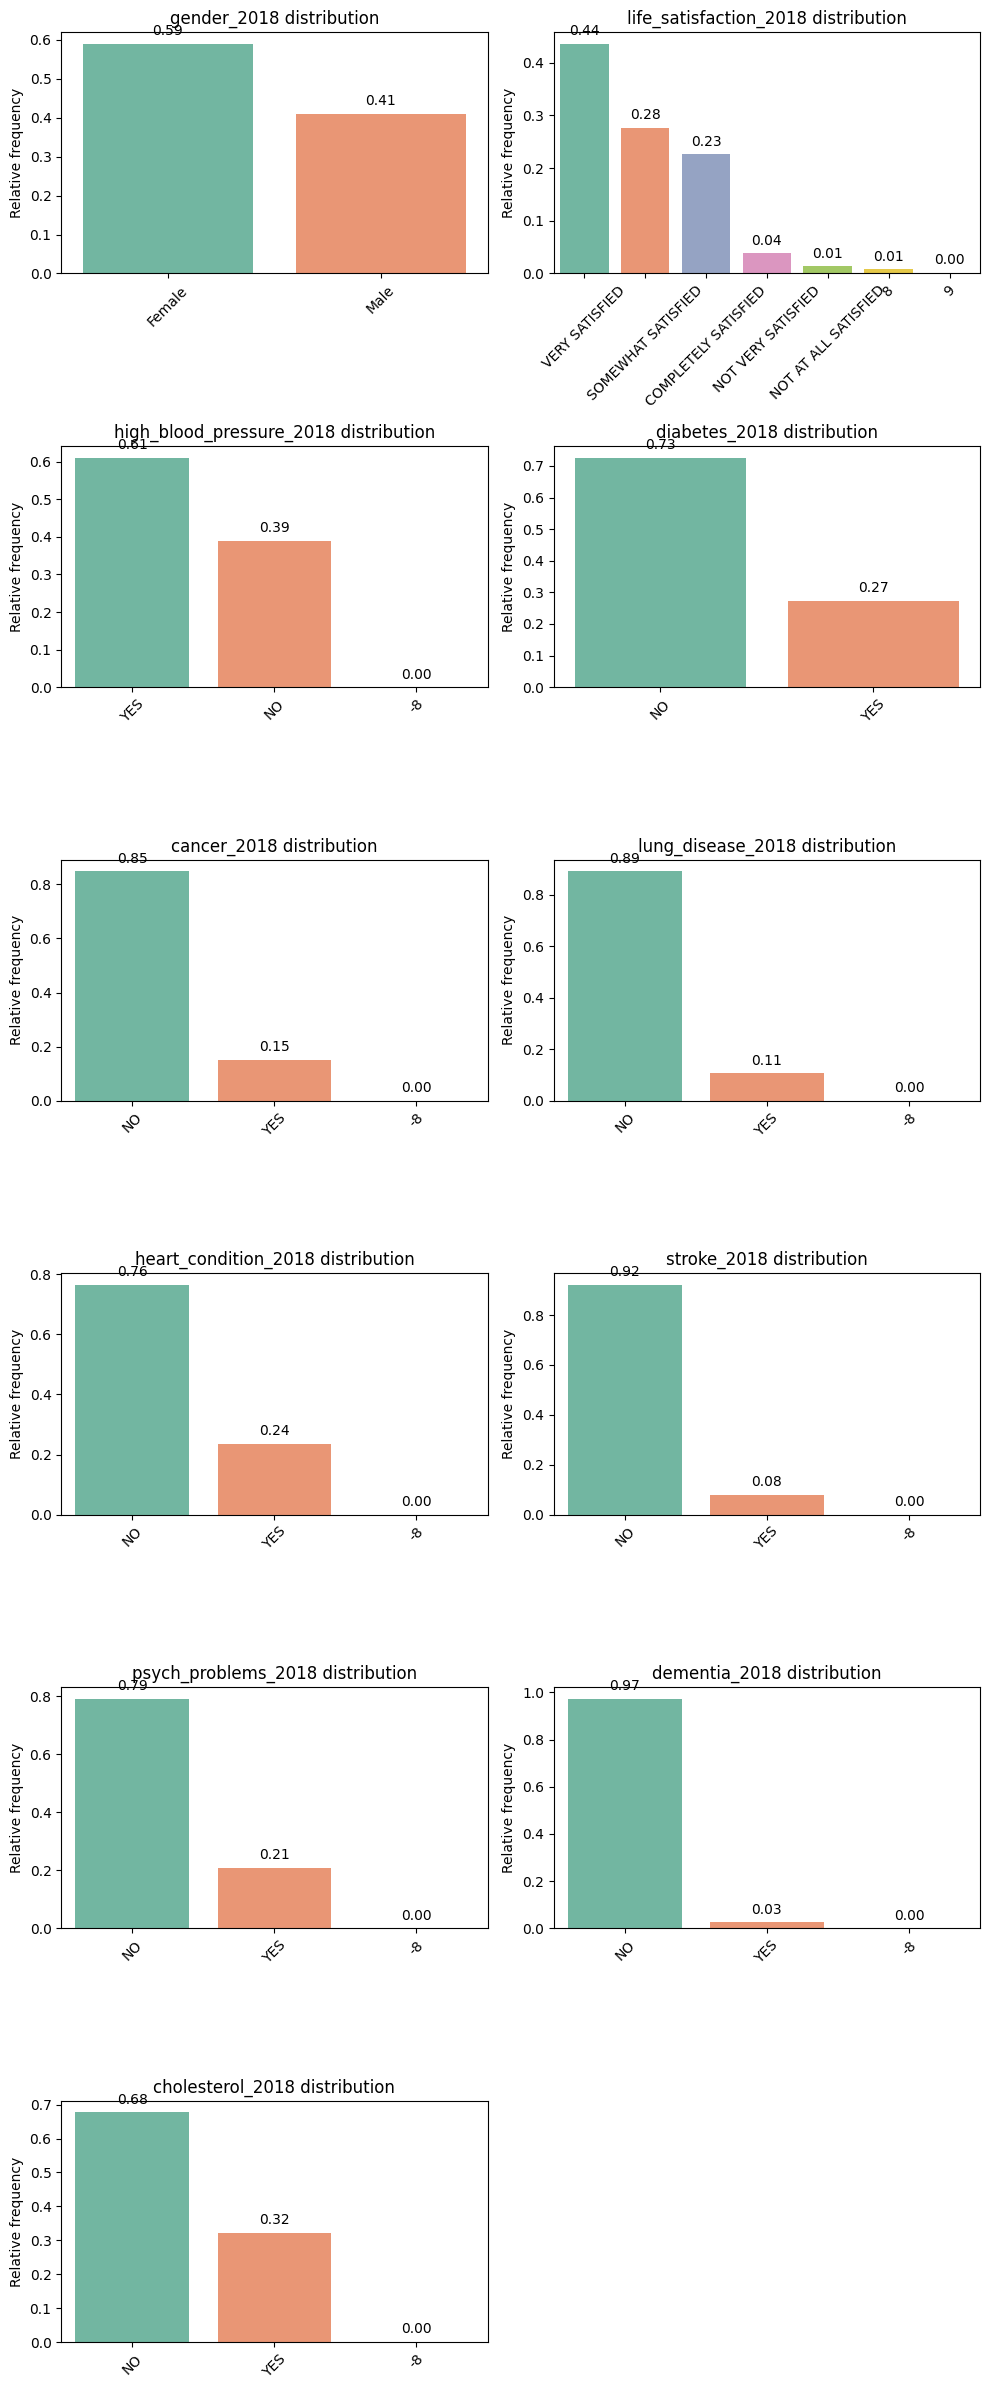

In [10]:
categorical_distribution(df_survey_2018, ["gender_2018","life_satisfaction_2018", "high_blood_pressure_2018","diabetes_2018","cancer_2018","lung_disease_2018", 
                                                "heart_condition_2018", "stroke_2018", "psych_problems_2018", "dementia_2018", "cholesterol_2018"], relative = True, values= True)

In [176]:
#8 means NOT VERY SATISFIED and 9 means NOT AT ALL SATISFIED SO I CLEAN.

satisfaction_mapping = {
    1: "COMPLETELY SATISFIED",
    2: "VERY SATISFIED",
    3: "SOMEWHAT SATISFIED",
    4: "NOT VERY SATISFIED",
    5: "NOT AT ALL SATISFIED",
    8: "NOT VERY SATISFIED",
    9: "NOT AT ALL SATISFIED"
}
df_survey_2018["life_satisfaction_2018"] = df_survey_2018["life_satisfaction_2018"].replace(satisfaction_mapping)

There are some -8 in the rest of the categorical data, I've checked and it means that they doesn't know. As they are 4 to 7 cases out of 20K, I'm going to simplify converting them to "NO".

In [177]:
df_survey_2018.dementia_2018.value_counts()

dementia_2018
NO     16442
YES      448
-8         4
Name: count, dtype: int64

In [178]:
df_survey_2018.cholesterol_2018.value_counts()

cholesterol_2018
NO     11607
YES     5532
-8         7
Name: count, dtype: int64

In [179]:
binary_columns = ["high_blood_pressure_2018", "diabetes_2018", "cancer_2018", 
                  "lung_disease_2018", "heart_condition_2018", "stroke_2018",
                  "psych_problems_2018", "dementia_2018","cholesterol_2018"]

df_survey_2018[binary_columns] = df_survey_2018[binary_columns].replace({-8:"NO"})


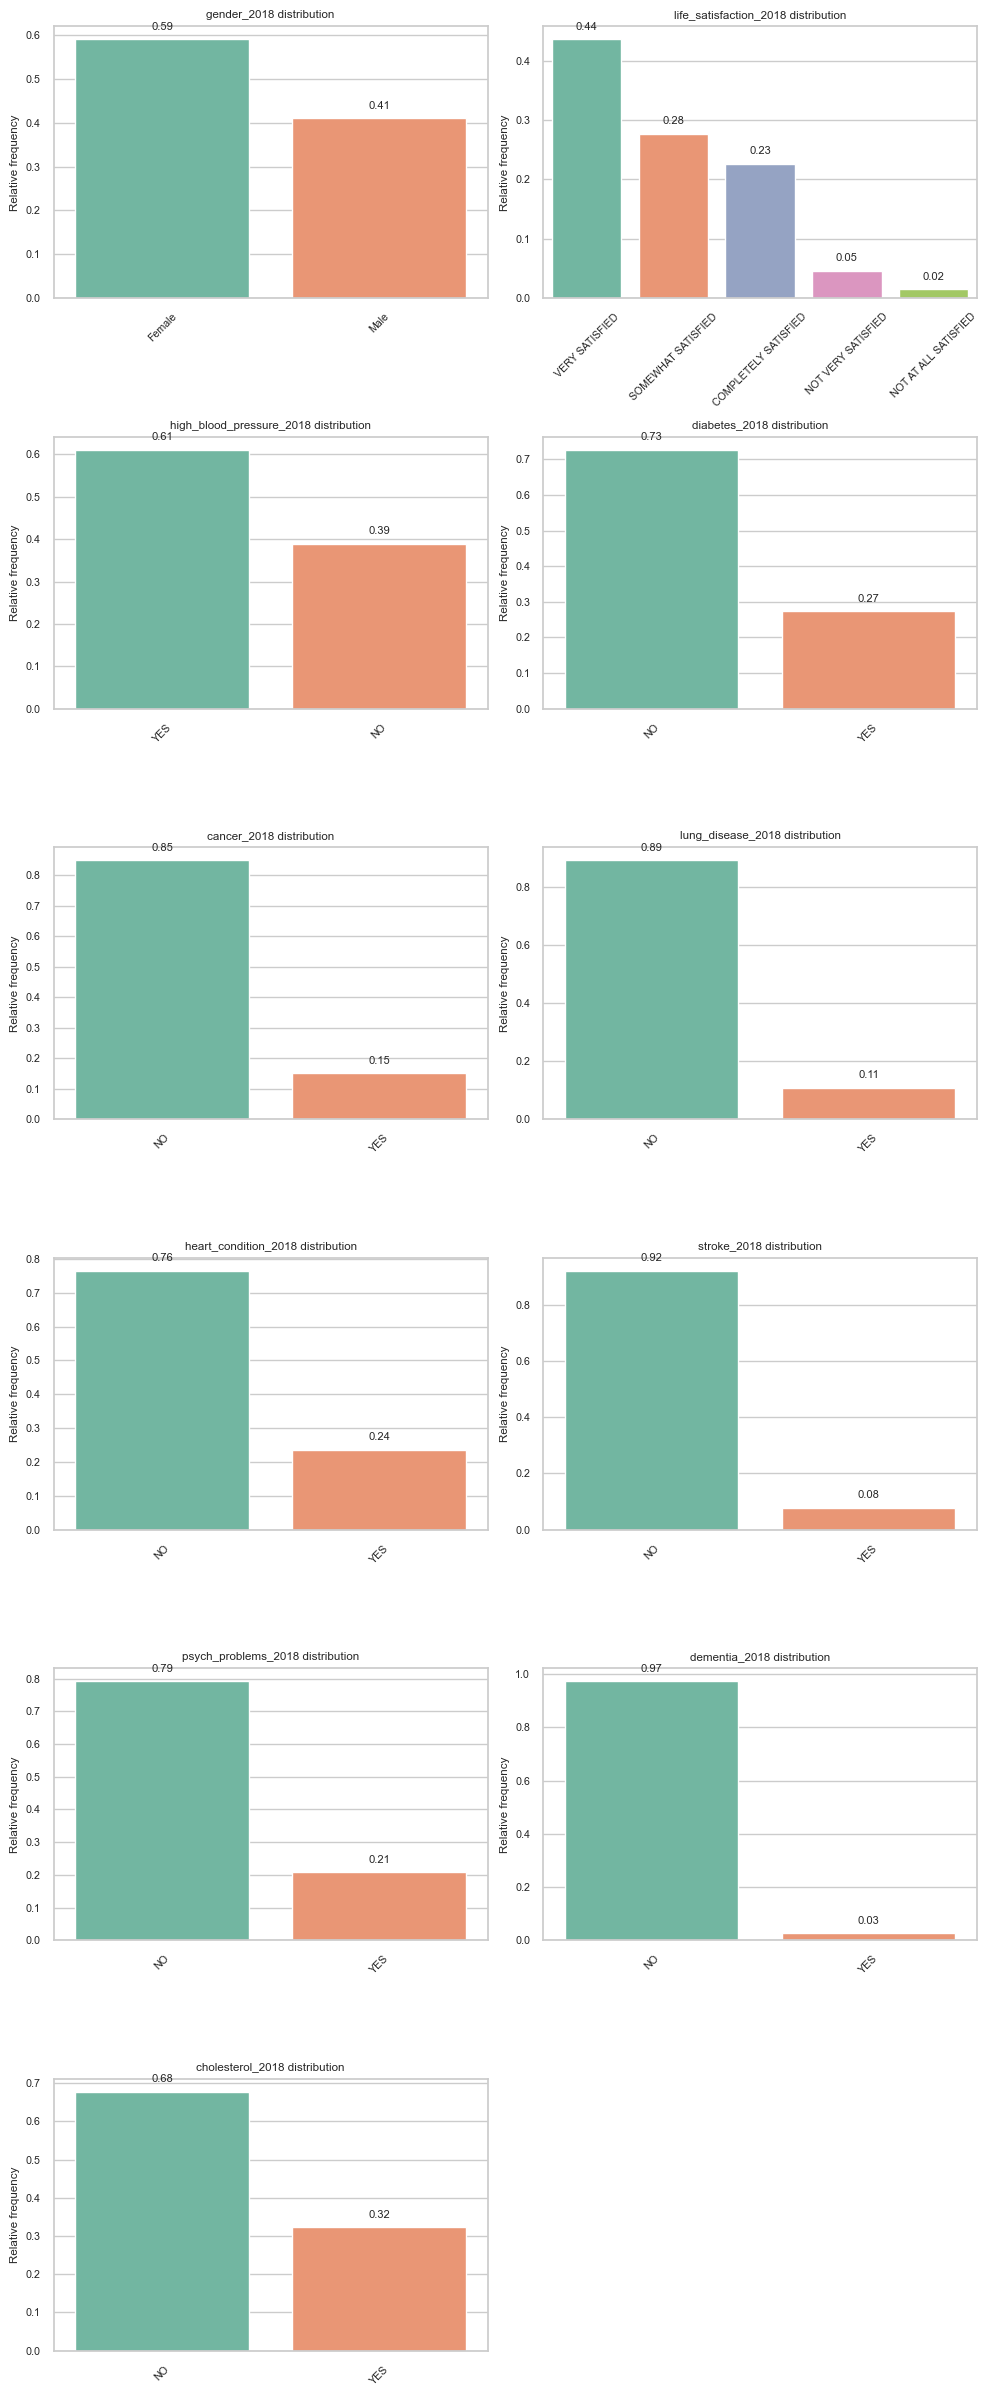

In [180]:
categorical_distribution(df_survey_2018, ["gender_2018","life_satisfaction_2018", "high_blood_pressure_2018","diabetes_2018","cancer_2018","lung_disease_2018", 
                                                "heart_condition_2018", "stroke_2018", "psych_problems_2018", "dementia_2018", "cholesterol_2018"], relative = True, values= True)

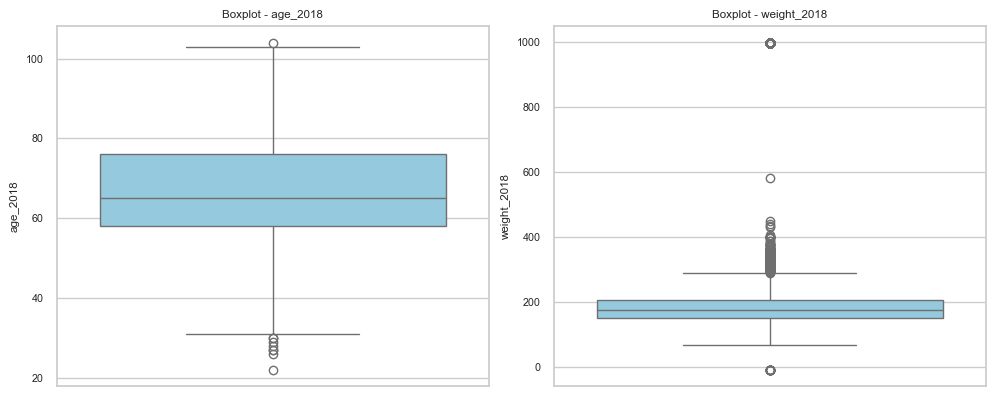

In [181]:
boxplot_with_outliers(df_survey_2018, columns=["age_2018", "weight_2018"])

In [182]:
df_survey_2018.weight_2018.max()

max_weight = df_survey_2018['weight_2018'].idxmax()

row_max_weight = df_survey_2018.loc[max_weight]

row_max_weight

HHIDPN                                  10708030
HHID                                       10708
age_2018                                      72
gender_2018                               Female
life_satisfaction_2018      NOT AT ALL SATISFIED
high_blood_pressure_2018                      NO
diabetes_2018                                YES
cancer_2018                                  YES
lung_disease_2018                             NO
heart_condition_2018                          NO
stroke_2018                                  YES
psych_problems_2018                           NO
dementia_2018                                 NO
cholesterol_2018                              NO
weight_2018                                999.0
Name: 41, dtype: object

Could be possible, I don't delete.

In [183]:
min_weight = df_survey_2018['weight_2018'].idxmin()

row_min_weight = df_survey_2018.loc[min_weight]

row_min_weight

HHIDPN                            50925010
HHID                                 50925
age_2018                                79
gender_2018                         Female
life_satisfaction_2018      VERY SATISFIED
high_blood_pressure_2018               YES
diabetes_2018                           NO
cancer_2018                             NO
lung_disease_2018                       NO
heart_condition_2018                   YES
stroke_2018                             NO
psych_problems_2018                     NO
dementia_2018                           NO
cholesterol_2018                        NO
weight_2018                           -8.0
Name: 2686, dtype: object

In [184]:
rows_with_minus_eight = df_survey_2018.loc[df_survey_2018['weight_2018'] == -8]

rows_with_minus_eight


,HHIDPN,HHID,age_2018,gender_2018,life_satisfaction_2018,high_blood_pressure_2018,diabetes_2018,cancer_2018,lung_disease_2018,heart_condition_2018,stroke_2018,psych_problems_2018,dementia_2018,cholesterol_2018,weight_2018
2686,50925010,50925,79,Female,VERY SATISFIED,YES,NO,NO,NO,YES,NO,NO,NO,NO,-8.0
4123,81844020,81844,85,Female,SOMEWHAT SATISFIED,YES,NO,YES,NO,NO,NO,YES,NO,YES,-8.0
4692,114482020,114482,71,Female,VERY SATISFIED,NO,NO,NO,NO,NO,NO,NO,NO,NO,-8.0
5247,141395010,141395,76,Male,VERY SATISFIED,YES,YES,YES,NO,NO,NO,NO,NO,NO,-8.0
5597,156187020,156187,70,Female,VERY SATISFIED,YES,NO,NO,YES,YES,NO,NO,NO,NO,-8.0
6093,200352011,200352,68,Female,NOT VERY SATISFIED,YES,NO,YES,NO,YES,NO,NO,NO,NO,-8.0
7804,501238020,501238,68,Female,SOMEWHAT SATISFIED,YES,YES,NO,NO,NO,NO,YES,NO,YES,-8.0
8509,502103010,502103,66,Female,SOMEWHAT SATISFIED,YES,NO,NO,NO,NO,NO,NO,NO,NO,-8.0
8843,502580010,502580,64,Female,VERY SATISFIED,NO,YES,NO,NO,NO,NO,NO,NO,NO,-8.0
9279,521877010,521877,63,Female,VERY SATISFIED,YES,NO,NO,NO,NO,NO,NO,NO,NO,-8.0


In this case this is impossible, maybe they didn't note the real weight in the survey, so I'll delete this value.

In [185]:
df_survey_2018.loc[df_survey_2018['weight_2018'] == -8] = np.nan

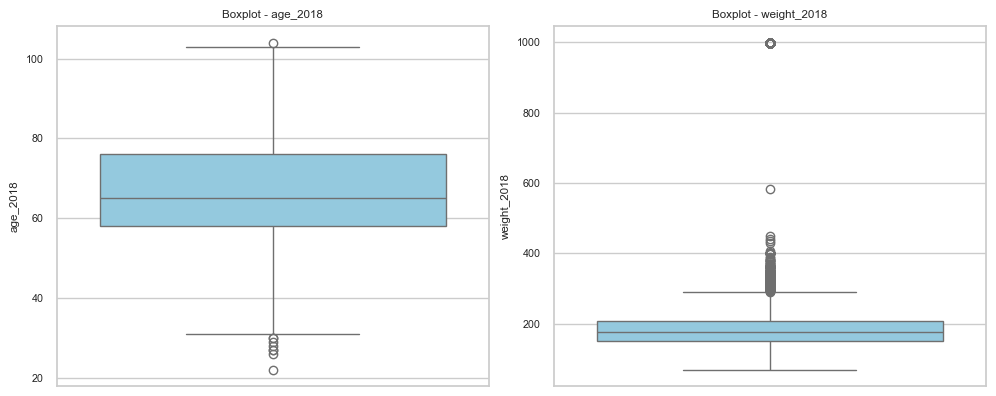

In [186]:
boxplot_with_outliers(df_survey_2018, columns=["age_2018", "weight_2018"])

In [187]:
output_file = "./data/df_survey_2018_clean2.xlsx"
df_survey_2018.to_excel(output_file, index=False)

In [188]:
df_survey_2020 = pd.read_excel("./data/df_survey_2020_clean.xlsx")
df_survey_2020

,HHIDPN,HHID,age_2020,gender_2020,life_satisfaction_2020,high_blood_pressure_2020,diabetes_2020,cancer_2020,lung_disease_2020,heart_condition_2020,stroke_2020,psych_problems_2020,dementia_2020,cholesterol_2020,weight_2020
0,10003030,10003,64,Female,COMPLETELY SATISFIED,YES,NO,NO,YES,NO,NO,YES,NaN,YES,200.0
1,10004040,10004,73,Female,VERY SATISFIED,YES,NO,NO,NO,NO,NO,NO,NO,YES,154.0
2,10013040,10013,72,Female,VERY SATISFIED,YES,NO,NO,NO,NO,NO,NO,NO,YES,138.0
3,10038010,10038,83,Male,VERY SATISFIED,NO,NO,NO,NO,YES,NO,NO,NO,NO,150.0
4,10038040,10038,77,Female,VERY SATISFIED,NO,NO,NO,NO,NO,NO,NO,NO,YES,135.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15718,923525010,923525,63,Female,VERY SATISFIED,YES,NO,NO,NO,NO,YES,NO,YES,YES,140.0
15719,923525020,923525,65,Male,VERY SATISFIED,NO,NO,NO,NO,NO,NO,NO,NO,NO,155.0
15720,952836010,952836,61,Female,VERY SATISFIED,NO,YES,NO,NO,NO,NO,NO,NO,YES,154.0
15721,958361010,958361,56,Male,VERY SATISFIED,NO,NO,NO,NO,YES,NO,NO,NO,NO,215.0


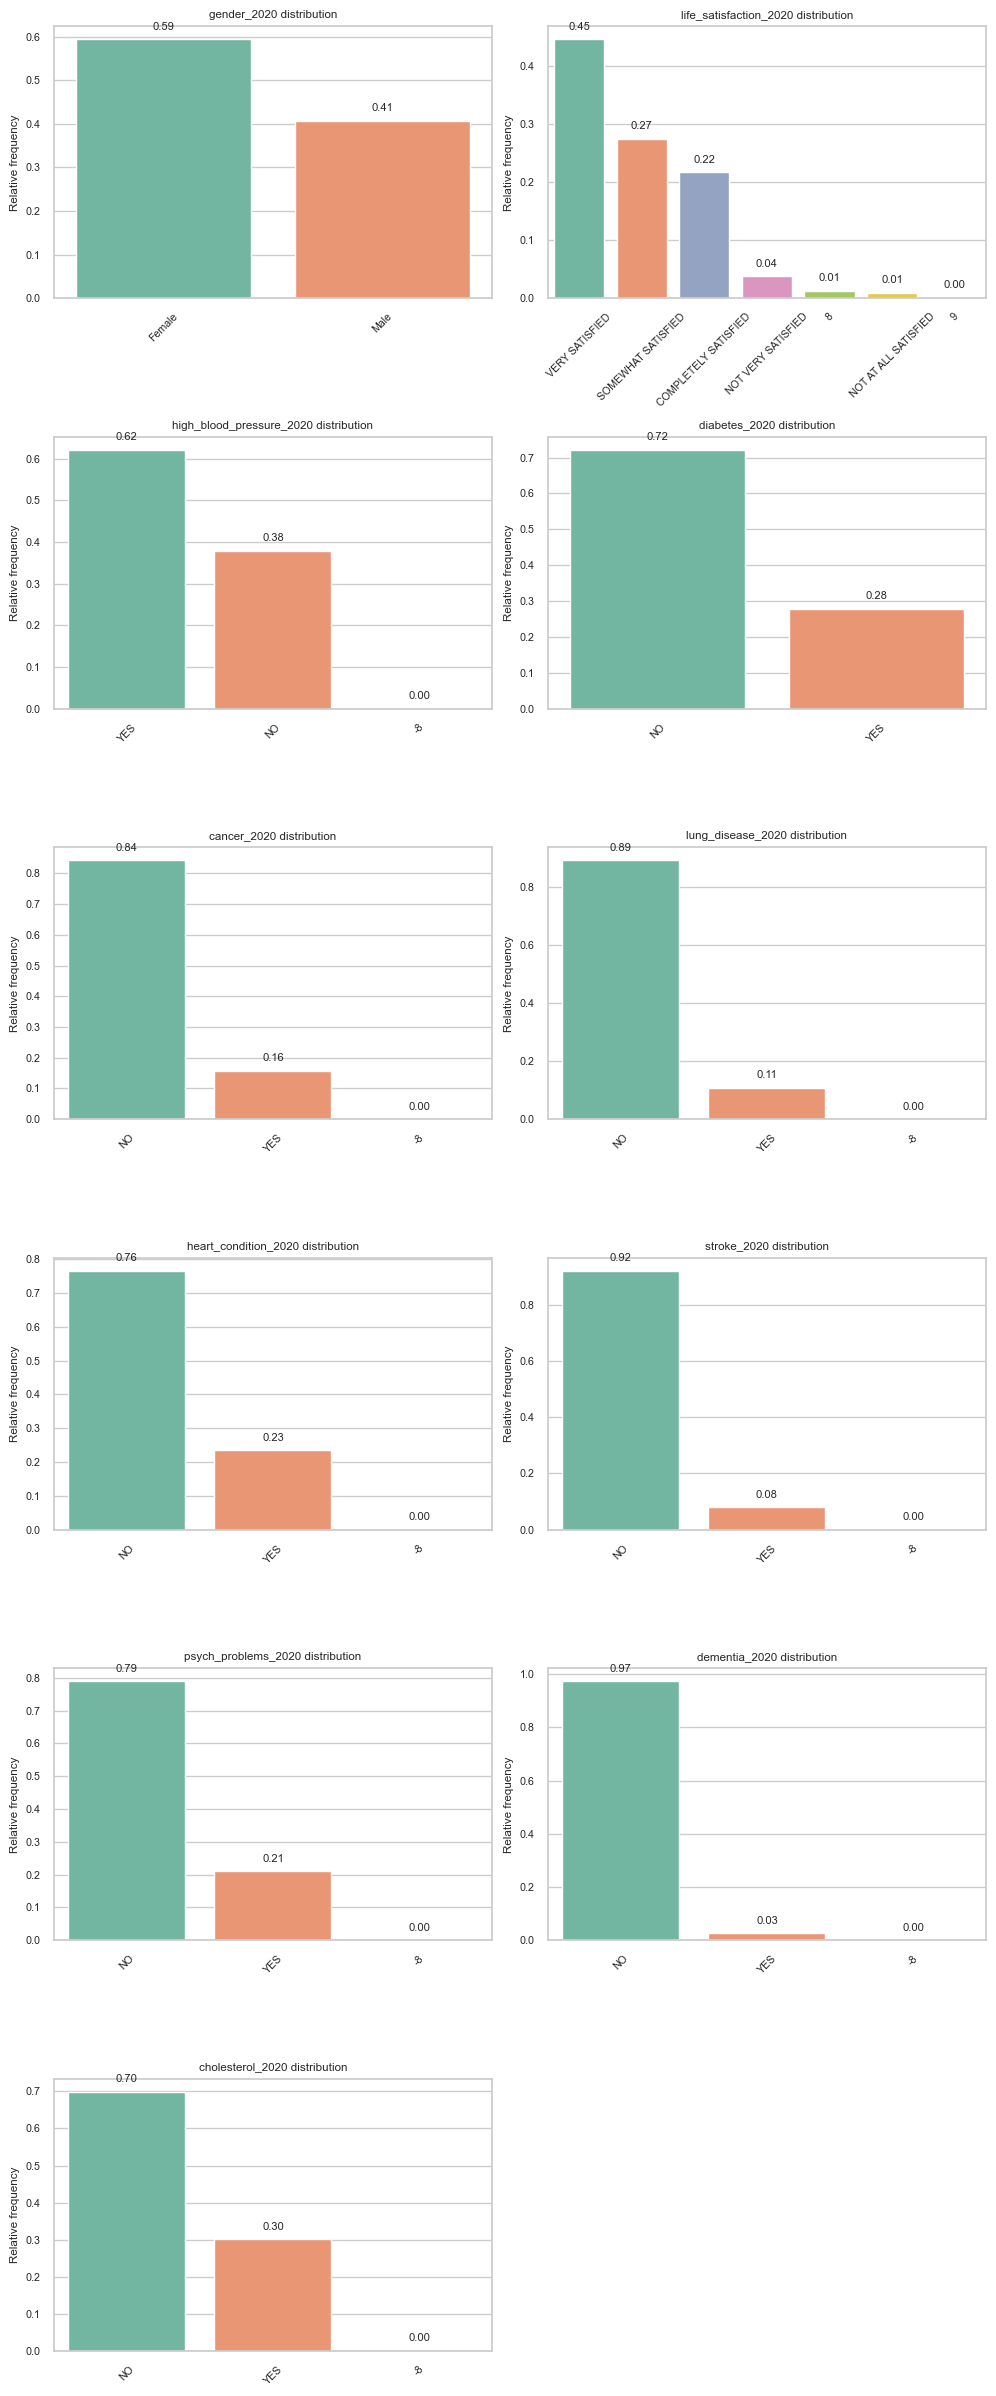

In [189]:
categorical_distribution(df_survey_2020, ["gender_2020","life_satisfaction_2020", "high_blood_pressure_2020","diabetes_2020","cancer_2020","lung_disease_2020", 
                                                "heart_condition_2020", "stroke_2020", "psych_problems_2020", "dementia_2020", "cholesterol_2020"], relative = True, values= True)

Same as before, I process it the same way.

In [190]:
#8 means NOT VERY SATISFIED and 9 means NOT AT ALL SATISFIED SO I CLEAN.

satisfaction_mapping = {
    1: "COMPLETELY SATISFIED",
    2: "VERY SATISFIED",
    3: "SOMEWHAT SATISFIED",
    4: "NOT VERY SATISFIED",
    5: "NOT AT ALL SATISFIED",
    8: "NOT VERY SATISFIED",
    9: "NOT AT ALL SATISFIED"
}
df_survey_2020["life_satisfaction_2020"] = df_survey_2020["life_satisfaction_2020"].replace(satisfaction_mapping)

In [191]:
binary_columns = ["high_blood_pressure_2020", "diabetes_2020", "cancer_2020", 
                  "lung_disease_2020", "heart_condition_2020", "stroke_2020",
                  "psych_problems_2020", "dementia_2020","cholesterol_2020"]

df_survey_2020[binary_columns] = df_survey_2020[binary_columns].replace({-8:"NO"})

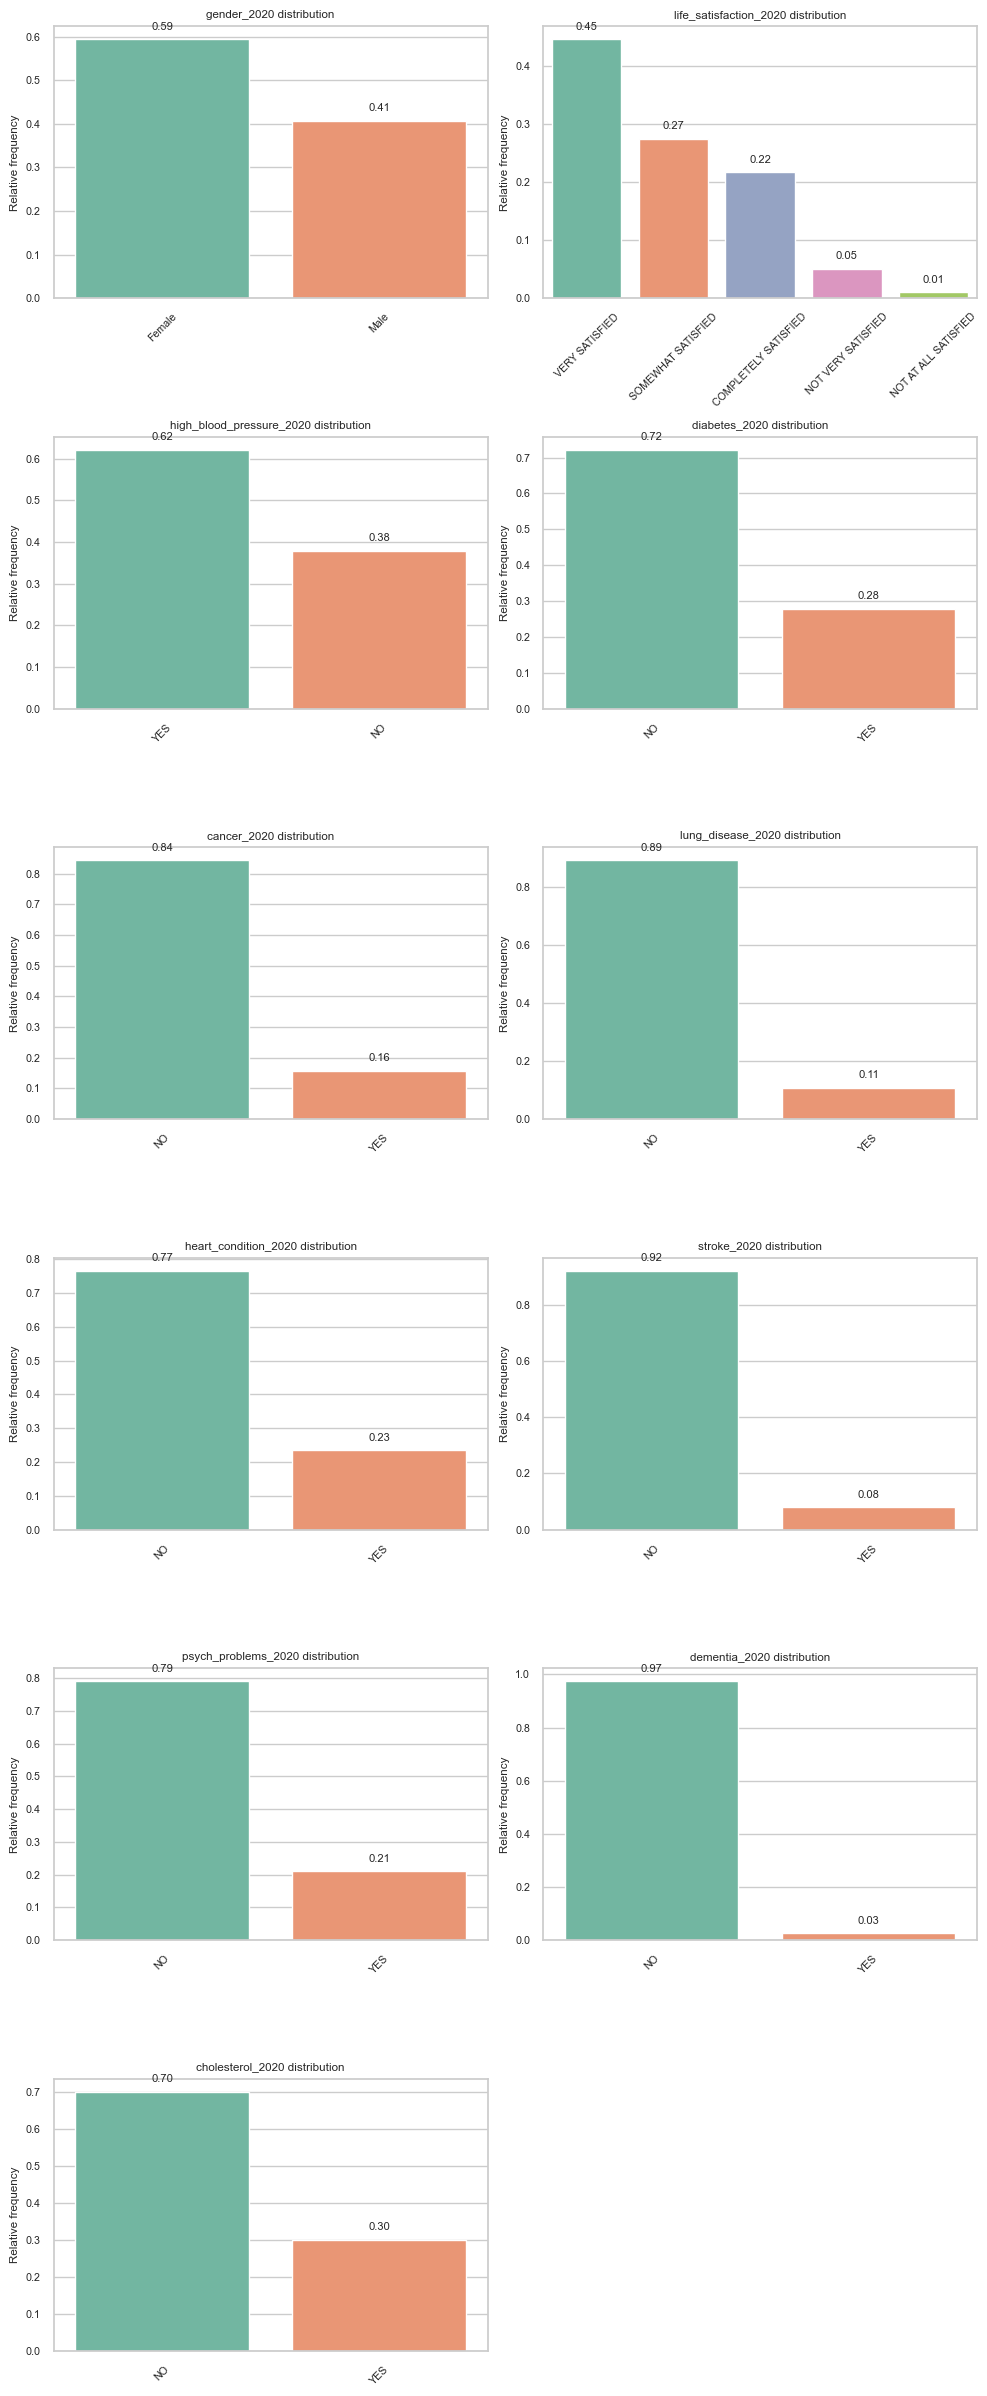

In [192]:
categorical_distribution(df_survey_2020, ["gender_2020", "life_satisfaction_2020", "high_blood_pressure_2020","diabetes_2020","cancer_2020","lung_disease_2020", 
                                                "heart_condition_2020", "stroke_2020", "psych_problems_2020", "dementia_2020", "cholesterol_2020"], relative = True, values= True)

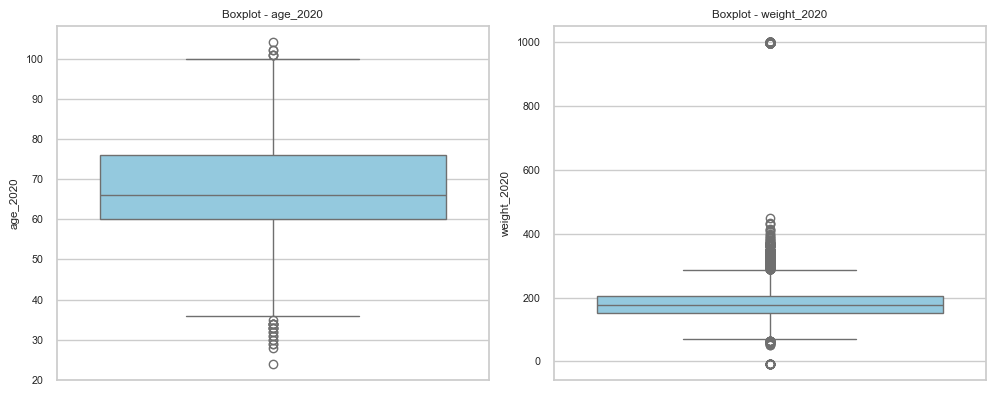

In [193]:
boxplot_with_outliers(df_survey_2020, columns=["age_2020", "weight_2020"])

In [194]:
df_survey_2020.loc[df_survey_2020['weight_2020'] == -8] = np.nan

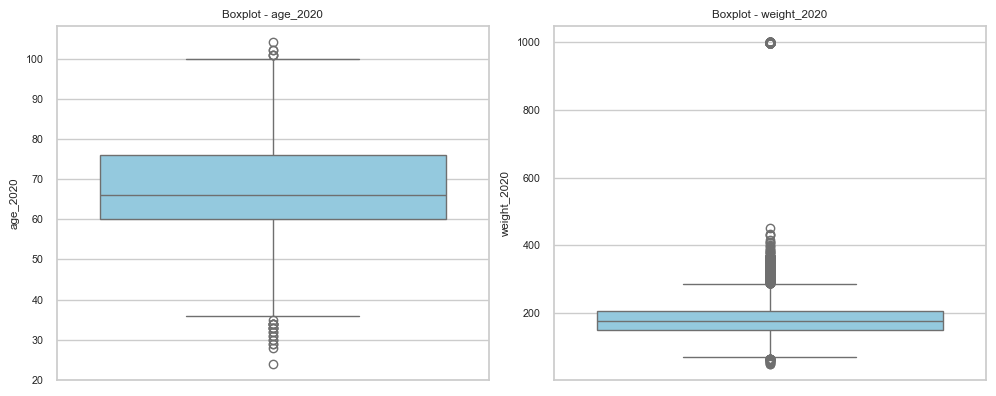

In [195]:
boxplot_with_outliers(df_survey_2020, columns=["age_2020", "weight_2020"])

In [196]:
output_file = "./data/df_survey_2020_clean2.xlsx"
df_survey_2020.to_excel(output_file, index=False)

Now I'm going to proceed similarly with the rest of the data:

In [6]:
vbs_2016 = pd.read_excel("./data/vbs_2016_clean.xlsx")

vbs_2016

,HHID,BASOPHIL_COUNT_X10E9_L,EOSINOPHIL_COUNT_X10E9_L,ALBUMIN_G_DL,ALKALINE_PHOSPHATASE_U_L,ALANINE_AMINOTRANSFERASE_U_L,LYMPHOCYTE_COUNT_X10E9_L,MONOCYTE_COUNT_X10E9_L,NEUTROPHIL_COUNT_X10E9_L,ASPARTATE_AMINOTRANSFERASE_U_L,...,SODIUM_MMOL_L,PERCENT_NEUTROPHILS,B_TYPE_NATRIURETIC_PEPTIDE_N_TERMINAL_PRO_NT_PROBNP_PG_ML,PLATELET_DISTRIBUTION_WIDTH_FL,PLATELET_COUNT_10E9_L,RED_BLOOD_CELL_COUNT_10E12_L,RED_CELL_DISTRIBUTION_WIDTH_PERCENT,TRIGLYCERIDES_MG_DL,PROTEIN_TOTAL_G_DL,WHITE_BLOOD_CELL_COUNT_10E9_L
0,10013,0.1,0.3,4.1,50.0,15.0,3.9,1.0,6.7,21.0,...,138.0,56.0,114.0,14.8,400.0,4.45,16.3,95.0,7.2,11.9
1,10038,0.0,0.1,4.0,48.0,16.0,1.5,0.5,3.9,24.0,...,136.0,65.0,97.0,16.5,161.0,5.10,12.8,91.0,6.8,6.0
2,10038,0.0,0.2,4.1,89.0,21.0,1.1,0.4,3.6,20.0,...,141.0,67.0,40.0,11.6,294.0,4.53,14.9,89.0,7.3,5.4
3,10075,0.0,0.2,4.3,77.0,27.0,3.0,0.5,3.7,26.0,...,135.0,50.5,93.0,12.7,255.0,4.29,14.8,191.0,7.5,7.3
4,10147,0.0,0.1,3.6,64.0,12.0,1.6,0.3,1.9,17.0,...,138.0,48.0,145.0,12.2,156.0,3.35,13.5,96.0,6.6,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9929,923333,0.1,0.2,3.8,74.0,26.0,2.5,0.6,4.6,20.0,...,137.0,57.9,98.0,11.6,344.0,5.01,13.3,76.0,7.3,7.9
9930,923489,0.1,0.3,4.2,81.0,15.0,3.8,0.8,5.2,16.0,...,140.0,50.9,35.0,15.7,234.0,4.26,14.4,147.0,7.7,10.1
9931,923498,0.1,0.1,4.2,87.0,19.0,2.4,0.5,4.9,21.0,...,138.0,61.4,23.0,11.7,256.0,4.72,12.4,109.0,7.0,8.0
9932,952836,0.1,0.1,4.3,136.0,28.0,1.6,0.3,2.4,19.0,...,144.0,53.7,12.0,14.4,240.0,5.45,14.9,105.0,7.4,4.5


They are all numerical data:

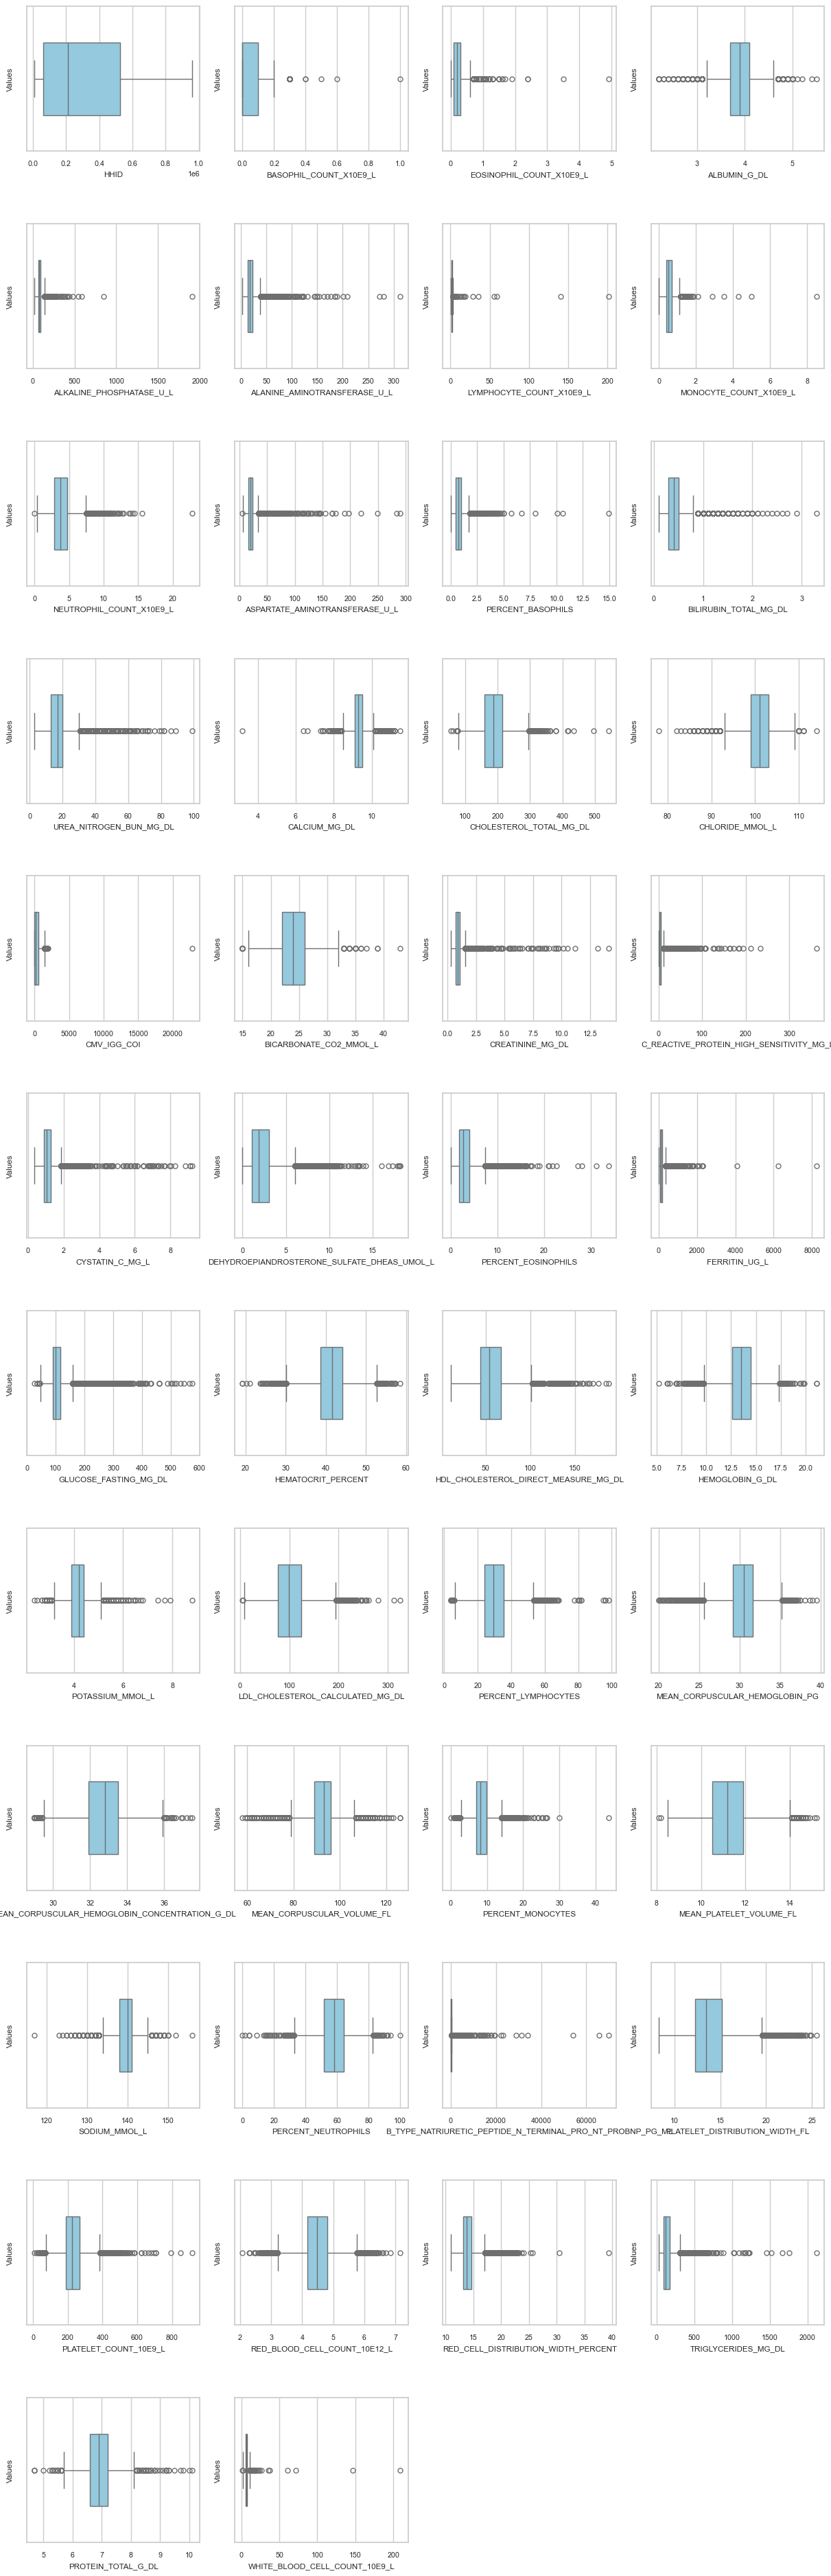

In [156]:
boxplots(vbs_2016)

It seems that values are OK, there is a high outlier in CMV but can be related to a very old individual so I keep it.

In [154]:
vbs_2_2016 = pd.read_excel("./data/vbs_2_2016_clean.xlsx")

vbs_2_2016

,HHID,VITAMIN_D2,VITAMIN_D3,TGF_BETA,IL_10,IL_1RA,IL6,TNFR1,IGF1
0,10013,0.29,41.52,28298.32,3.72,337.68,2.02,1800.65,125.0
1,10038,0.50,26.67,31650.09,4.18,476.46,3.22,1235.61,127.0
2,10038,0.58,33.97,46258.52,3.98,489.26,0.71,1519.17,115.0
3,10075,0.71,51.27,50627.77,2.93,602.78,6.05,1884.16,60.0
4,10147,29.89,5.65,33868.92,6.53,401.06,4.83,2354.28,103.0
...,...,...,...,...,...,...,...,...,...
9928,923333,0.68,34.80,55831.24,3.29,1071.71,6.09,2317.19,103.0
9929,923489,1.24,13.92,67706.01,2.36,631.89,12.30,1063.41,65.0
9930,923498,1.60,28.86,44854.43,2.36,853.32,2.27,1219.18,123.0
9931,952836,0.64,47.16,95159.80,3.50,691.23,2.20,1276.80,99.0


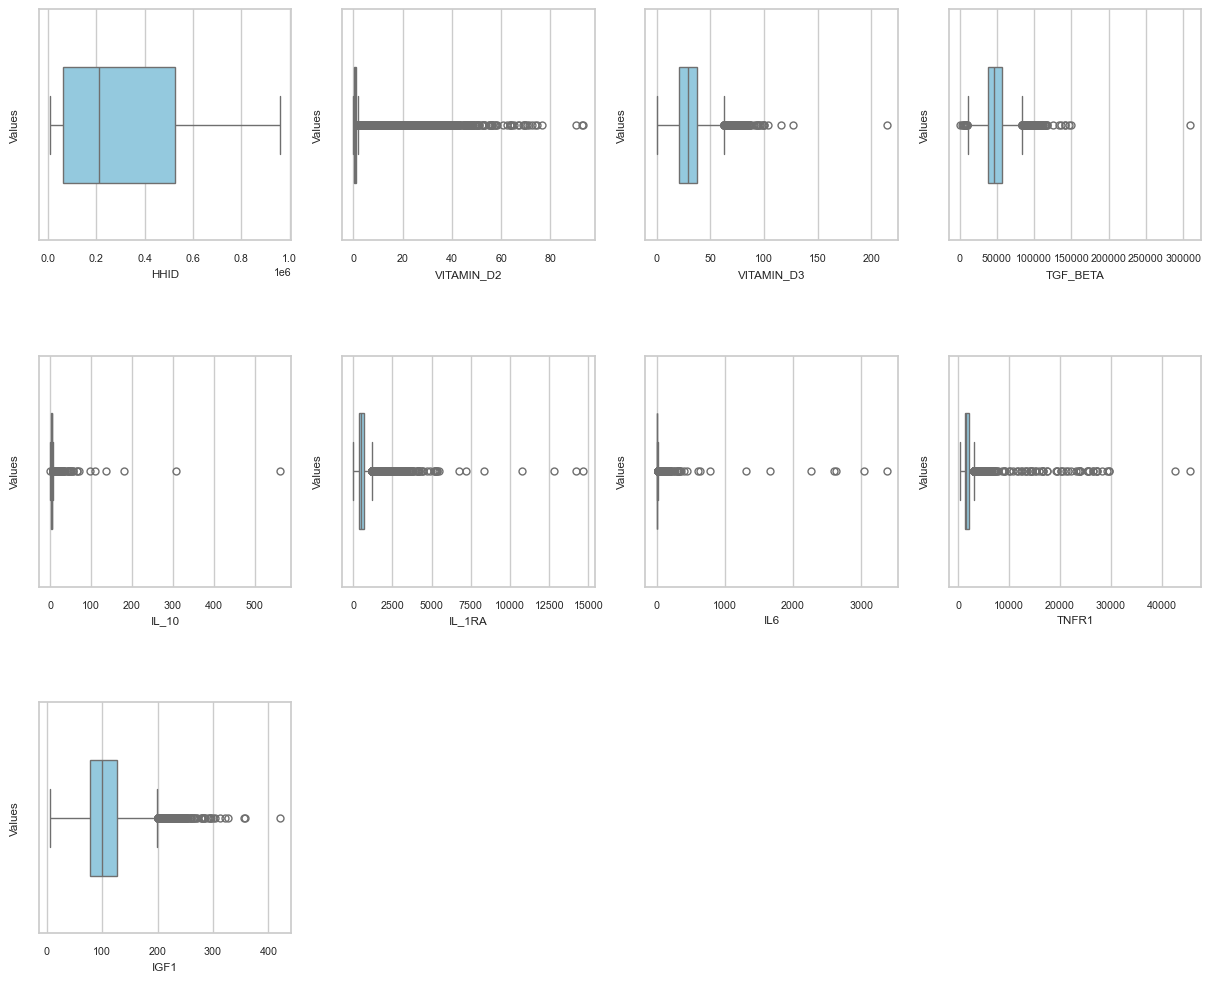

In [157]:
boxplots(vbs_2_2016)

They seem OK.

In [158]:
vbs_sub_2016 = pd.read_excel("./data/vbs_sub_2016_clean.xlsx")

vbs_sub_2016

,HHID,MT_DNA_COPY_NUMBER,HOMOCYSTEINE,BDNF,CLUSTERIN
0,10038,0.79290,11.0,48204.59,168.54523
1,10075,0.64669,19.0,37899.17,469.05930
2,10325,0.94084,9.0,33051.09,191.45128
3,10451,1.53996,13.0,47041.69,199.83541
4,10458,1.19968,17.0,NaN,NaN
...,...,...,...,...,...
4606,920735,0.68741,17.0,28764.00,264.37906
4607,920760,0.81769,10.0,47668.56,272.22703
4608,923333,NaN,NaN,43176.54,229.77343
4609,923498,1.06460,14.0,50038.57,215.38348


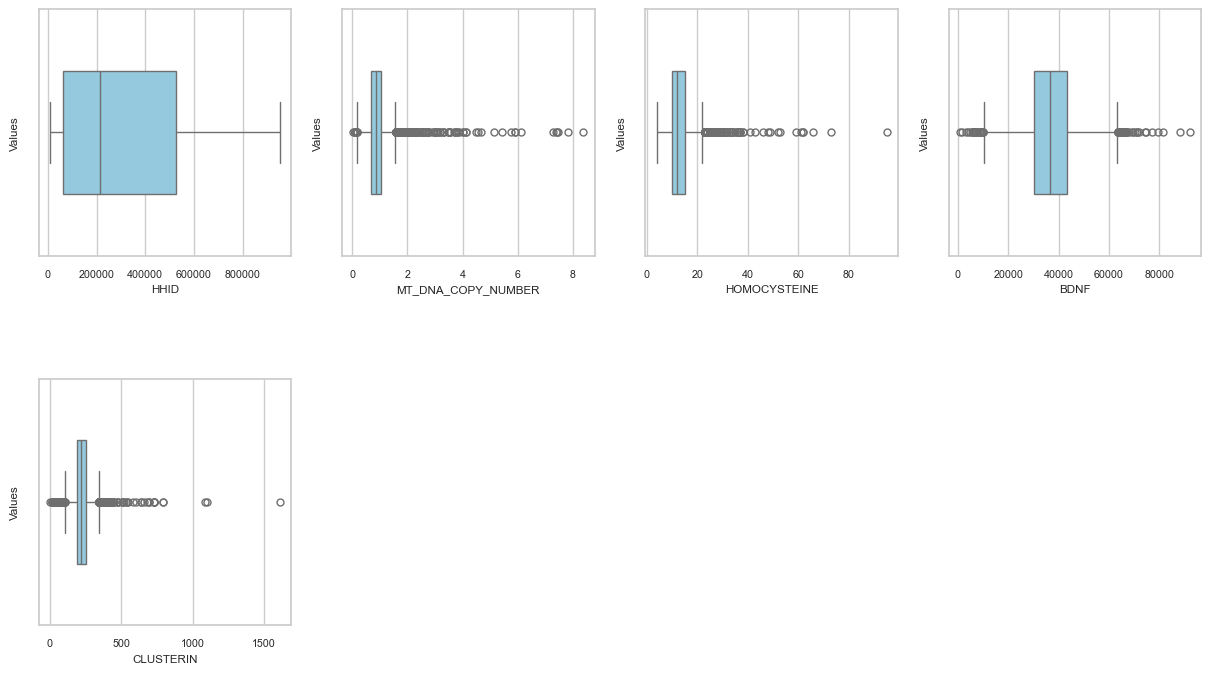

In [159]:
boxplots(vbs_sub_2016)

They seem OK.

In [160]:
cells_2016 = pd.read_excel("./data/cells_2016_clean.xlsx")

cells_2016

,HHID,Dendritic_Cells_Count,Myeloid_Dendritic_Cells_Count,Plasmacytoid_Dendritic_Cells_Count,Natural_Killer_Cells_Count,NK_Cells_CD56HI_Count,NK_Cells_CD56LO_Count,Monocytes_Count,CD16_Minus_Monocytes_Count,CD16_Plus_Monocytes_Count,...,T_Cells_Count,Naive_B_Cells_Count,B_Cells_Percentage,CD8_T_Cells_Percentage,CD4_T_Cells_Percentage,T_Cells_Percentage,Naive_B_Cells_Percentage,Natural_Killer_Cells_Percentage,Monocytes_Percentage,Dendritic_Cells_Percentage
0,10013,0.104285,0.084425,0.007982,0.337630,0.002132,0.332324,0.310794,0.271975,0.038760,...,2.492064,0.215931,0.109800,0.166839,0.775992,0.638991,0.504250,0.028372,0.026117,0.008763
1,10038,0.031364,0.025474,0.005427,0.099715,0.000055,0.090589,0.267549,0.254363,0.013152,...,1.161003,0.046752,0.072774,0.202672,0.743721,0.774002,0.428290,0.016619,0.044592,0.005227
2,10038,0.103617,0.077060,0.013212,0.161063,0.002226,0.139716,0.354915,0.324159,0.030684,...,0.263668,0.129388,0.156139,0.188123,0.704044,0.239698,0.753336,0.029826,0.065725,0.019188
3,10075,0.074522,0.064707,0.003330,0.561842,0.002113,0.544441,0.173671,0.149667,0.023964,...,1.133710,0.491301,0.234558,0.161764,0.769520,0.377903,0.698194,0.076965,0.023790,0.010209
4,10147,0.038061,0.032762,0.002390,0.128601,0.000185,0.124098,0.100916,0.096061,0.004762,...,1.287578,0.021659,0.024022,0.362528,0.591588,0.804737,0.563513,0.032150,0.025229,0.009515
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9928,923333,0.020217,0.013562,0.004110,0.204874,0.003468,0.196215,0.175219,0.166913,0.008277,...,2.049042,0.062600,0.040372,0.281669,0.578745,0.819617,0.620233,0.025933,0.022180,0.002559
9929,923489,0.072119,0.043699,0.008306,0.302078,0.001263,0.274594,0.208535,0.189700,0.018780,...,2.711510,0.444461,0.140247,0.296796,0.614586,0.713555,0.833983,0.029909,0.020647,0.007141
9930,923498,0.078463,0.050012,0.018327,0.052958,0.000188,0.050879,0.101136,0.100429,0.000635,...,1.527197,0.308480,0.211246,0.286436,0.684127,0.636332,0.608452,0.006620,0.012642,0.009808
9931,952836,0.034857,0.023927,0.006845,0.216339,0.001997,0.209297,0.068716,0.066291,0.002411,...,1.047363,0.097289,0.084028,0.189399,0.762283,0.654602,0.723641,0.048075,0.015270,0.007746


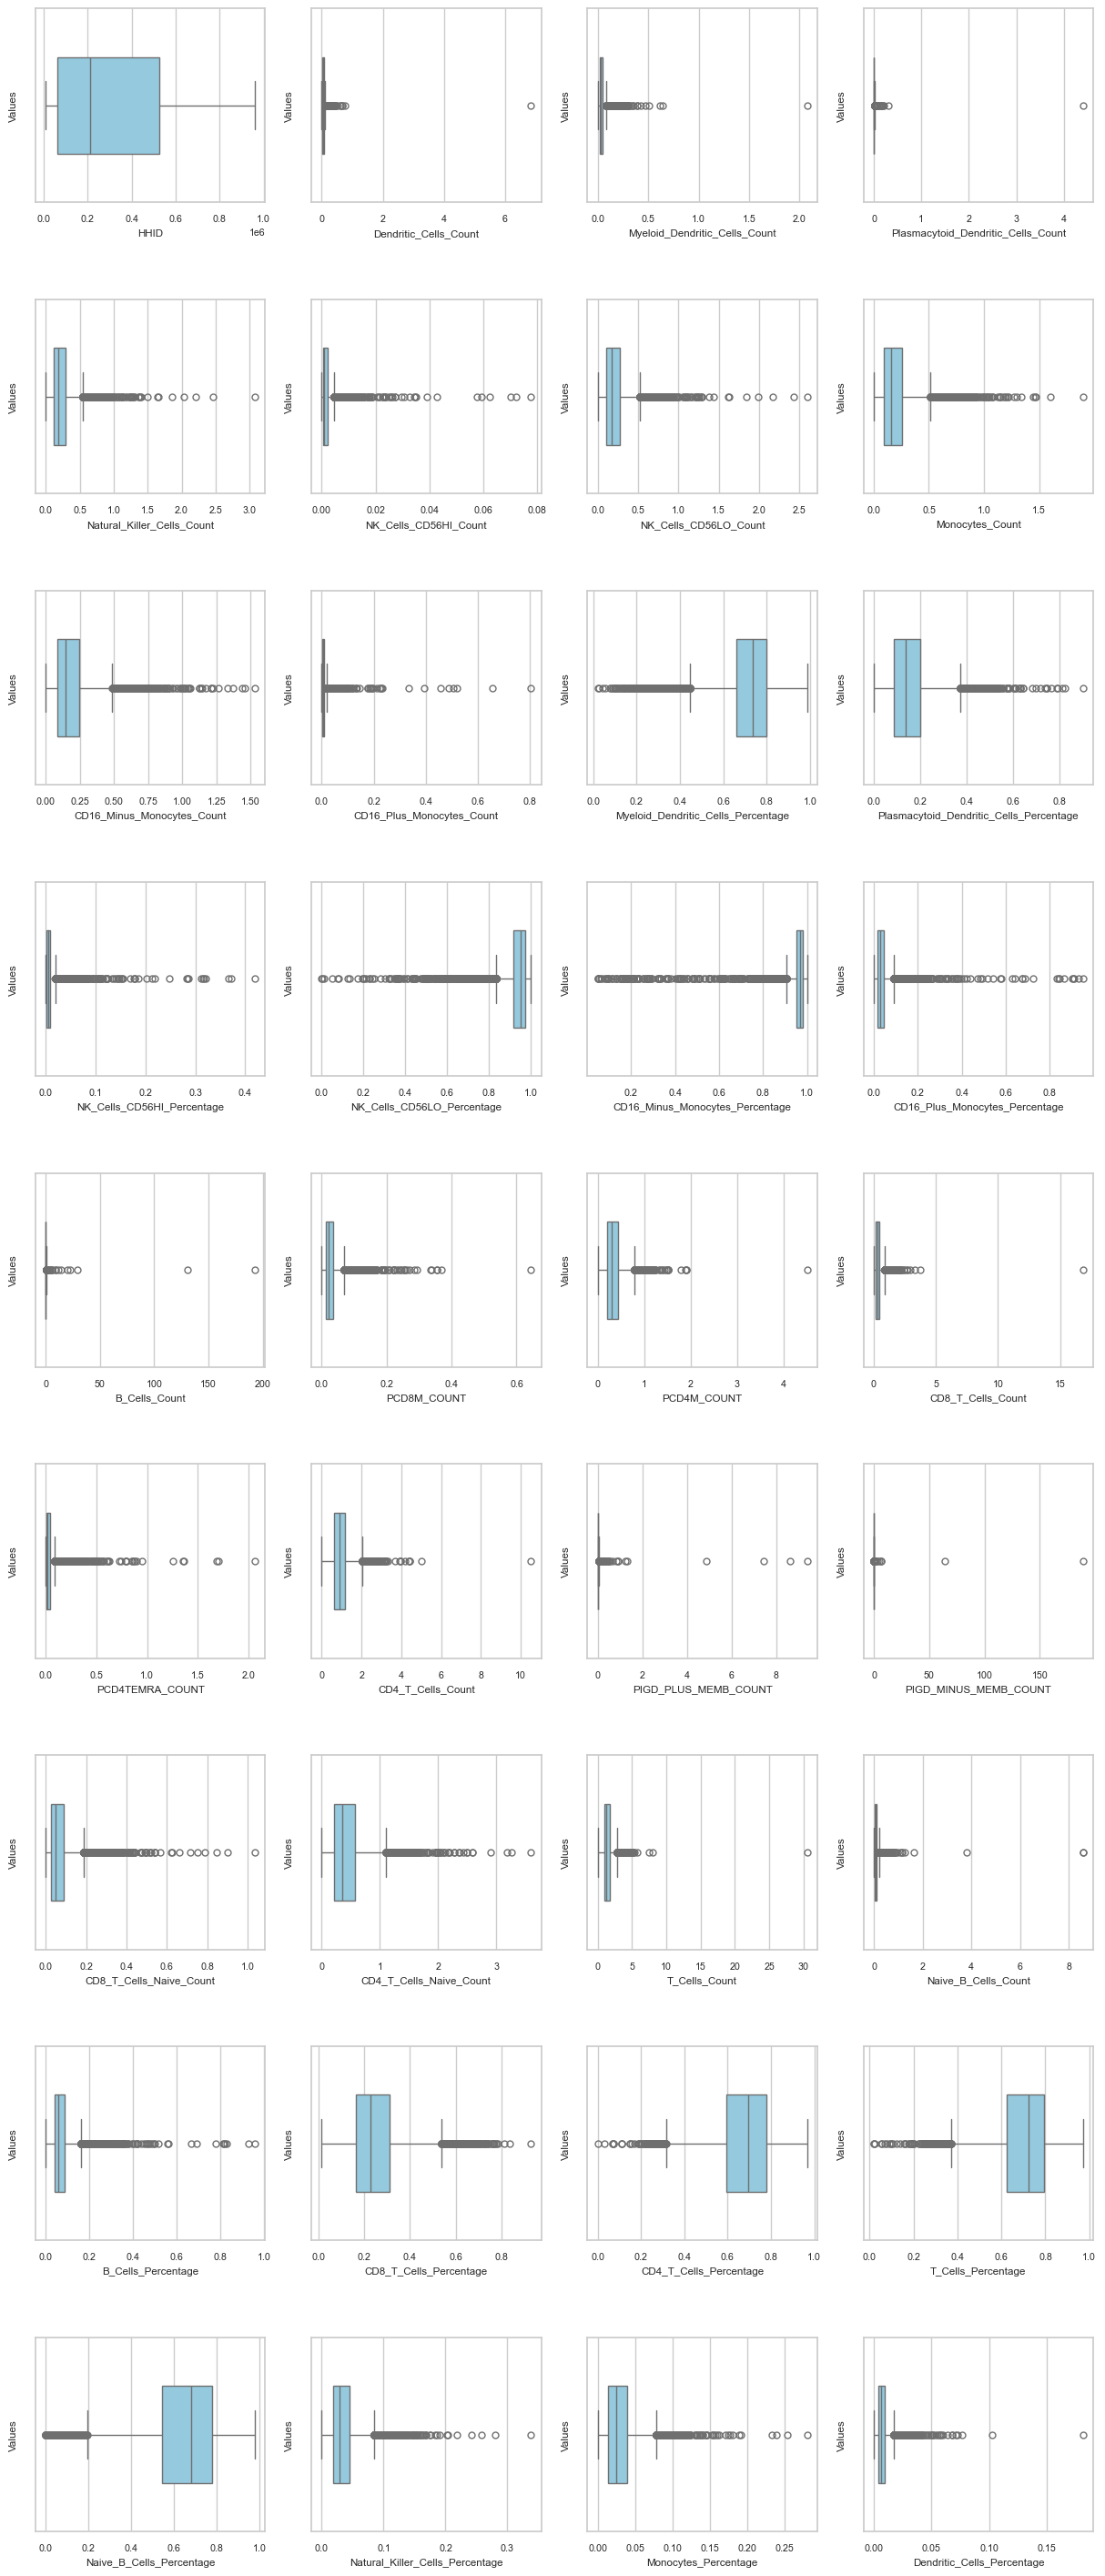

In [161]:
boxplots(cells_2016)

High values in:
- Dendritic cells
- Naive B count
- PIDG
- B cells count

Cam be related to age?

In [162]:
biomarker_2016 = pd.read_excel("./data/biomarker_2016_clean.xlsx")

biomarker_2016

,HHID,A1C,HDL,CHOLESTEROL,CRP,CYSTATIN_C
0,10075,NaN,61.467830,164.223628,4.278528,1.381702
1,10097,5.110263,60.526771,241.020878,0.680743,0.680781
2,10099,6.021532,31.353955,190.641882,4.040753,1.210389
3,10106,6.021532,80.289002,239.792122,NaN,NaN
4,10106,7.084678,45.469834,186.341236,16.016070,1.090261
...,...,...,...,...,...,...
7394,920690,5.262141,62.408888,215.217002,18.841932,0.972222
7395,923489,4.958385,77.465826,203.543820,0.562571,0.921037
7396,923489,5.414019,37.941365,167.295518,2.636823,0.488576
7397,923498,5.717776,66.173123,177.125566,1.809367,0.863584


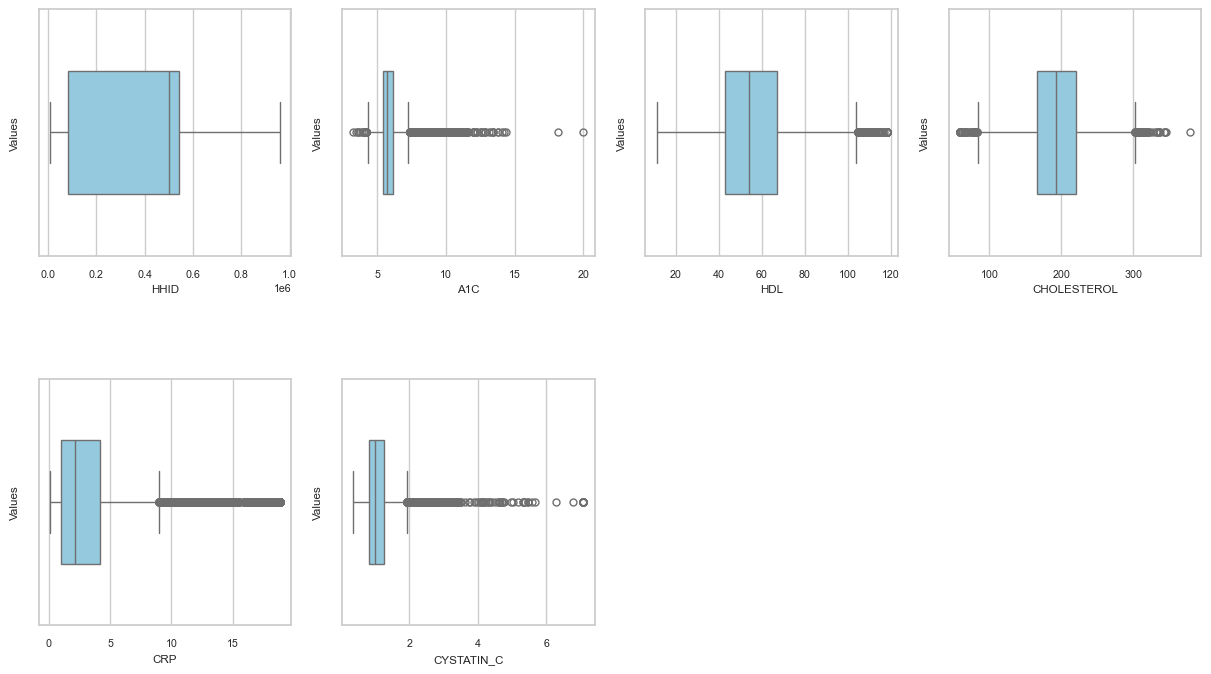

In [163]:
boxplots(biomarker_2016)

It seems ok.

All data is cleaned. I'll proceed with the correlation analysis in notebook_analysis.